### Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
data = pd.read_csv(r'C:/Users/hp/Downloads/Nonso-ml/ml_data.xls')

### Data Assessment and Transformation

In [3]:
# make a copy of the data
data_copy = data.copy()

In [4]:
# Display the first few rows of the dataset
data_copy.head()

,TransactionDate,OrderID,Quantity,PaymentMethod,SalesChannel,ProductName,Category,UnitPrice,CustomerCountry,CustomerDateOfBirth,CustomerGender,CustomerFirstName,CustomerLastName,CustomerCity,CustomerSignupDate,IsCurrent,Currency
0,2023-11-27,O1000000,7,Card,Website,Microphone,Audio Devices,1014.02,Canada,1966-05-17,Male,Kenneth,Rhodes,Vancouver,2023-07-15,True,NaN
1,2023-12-15,O1000001,72,Cash,In-Store,Laptop,Computers & Accessories,749.90,Japan,1968-11-15,Female,Melissa,Garcia,Nagoya,2024-01-17,True,NaN
2,2021-11-23,O1000002,95,PayPal,In-Store,Router,Networking Devices,471.11,Brazil,1972-02-15,Female,Ryan,Rogers,Brasília,2025-01-17,True,NaN
3,2021-01-20,O1000003,15,PayPal,Website,Microphone,Audio Devices,1415.66,Canada,1983-03-03,Female,Kimberly,Hansen,Ottawa,2022-08-30,True,NaN
4,2023-01-24,O1000004,7,Bank Transfer,Website,Monitor,Computers & Accessories,1362.50,China,1995-08-12,Male,Sierra,Sanchez,Beijing,2024-05-29,True,CNY


In [30]:
print(f' The data contains {data_copy.shape[0]} rows and {data_copy.shape[1]} columns.\n')

print('Percentage of missing values in each column:\n')
print(round(data_copy.isnull().sum()/len(data_copy)*100, 1))
print(f' The data contains {data_copy.duplicated().sum()} duplicate values.\n')

 The data contains 3500323 rows and 17 columns.

Percentage of missing values in each column:

TransactionDate         0.0
OrderID                 0.0
Quantity                0.0
PaymentMethod           0.0
SalesChannel            0.0
ProductName             0.4
Category                0.4
UnitPrice               0.4
CustomerCountry         0.0
CustomerDateOfBirth     0.0
CustomerGender          0.0
CustomerFirstName       0.0
CustomerLastName        0.0
CustomerCity            0.0
CustomerSignupDate      0.0
IsCurrent               0.0
Currency               70.0
dtype: float64
 The data contains 0 duplicate values.



In [7]:
# display information about the data
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503820 entries, 0 to 3503819
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TransactionDate      object 
 1   OrderID              object 
 2   Quantity             int64  
 3   PaymentMethod        object 
 4   SalesChannel         object 
 5   ProductName          object 
 6   Category             object 
 7   UnitPrice            float64
 8   CustomerCountry      object 
 9   CustomerDateOfBirth  object 
 10  CustomerGender       object 
 11  CustomerFirstName    object 
 12  CustomerLastName     object 
 13  CustomerCity         object 
 14  CustomerSignupDate   object 
 15  IsCurrent            bool   
 16  Currency             object 
dtypes: bool(1), float64(1), int64(1), object(14)
memory usage: 431.1+ MB


### Dealing with duplicate values

In [8]:
# There are about 3497 duplicate values in the dataset.
data_copy.drop_duplicates(inplace=True)
data_copy.duplicated().sum()

0

### Dealing with Null Values

In [25]:
# filter the missing values in the dataset excluding the currency column as the column isn't relevant to the analysis
data_copy[data_copy.iloc[:, :-1].isnull().any(axis=1)]

,TransactionDate,OrderID,Quantity,PaymentMethod,SalesChannel,ProductName,Category,UnitPrice,CustomerCountry,CustomerDateOfBirth,CustomerGender,CustomerFirstName,CustomerLastName,CustomerCity,CustomerSignupDate,IsCurrent,Currency
53,2023-01-13,O1000053,10,Card,Website,NaN,NaN,NaN,China,1995-09-08,Male,Kaitlin,Ramirez,Guangzhou,2023-07-19,True,CNY
364,2021-09-03,O1000363,69,Crypto,Website,NaN,NaN,NaN,USA,2003-06-07,Male,Ronald,Lopez,Los Angeles,2024-09-09,True,USD
1078,2022-03-17,O1001077,77,PayPal,Website,NaN,NaN,NaN,France,1963-08-24,Male,Samuel,Jones,Paris,2022-12-03,True,EUR
1318,2023-12-30,O1001317,13,Bank Transfer,In-Store,NaN,NaN,NaN,USA,1973-05-17,Female,Jocelyn,Maxwell,Chicago,2024-06-02,True,USD
1429,2021-06-14,O1001428,80,Crypto,In-Store,NaN,NaN,NaN,USA,1987-07-16,Male,Jacqueline,Hernandez,Houston,2022-05-09,True,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502108,2021-01-10,O4498554,94,Cash,In-Store,NaN,NaN,NaN,Brazil,1992-02-15,Female,Matthew,Johnston,Fortaleza,2024-09-27,True,NaN
3502982,2023-03-03,O4499428,31,Card,Website,NaN,NaN,NaN,Brazil,1991-06-09,Male,Autumn,Alexander,Brasília,2024-08-06,True,NaN
3503089,2021-08-03,O4499535,53,PayPal,In-Store,NaN,NaN,NaN,Germany,1996-10-27,Female,Suzanne,George,Cologne,2022-11-21,True,NaN
3503160,2024-05-15,O4499606,5,PayPal,Website,NaN,NaN,NaN,Japan,2003-04-10,Male,Willie,Wiggins,Nagoya,2024-09-04,True,NaN


In [ ]:
# to drop null values in the ProductName, Category and UnitPrice colum
data_copy.dropna(subset=['ProductName', 'Category', 'UnitPrice'], inplace=True) 

In [39]:
data_copy.isnull().sum()

TransactionDate              0
OrderID                      0
Quantity                     0
PaymentMethod                0
SalesChannel                 0
ProductName                  0
Category                     0
UnitPrice                    0
CustomerCountry              0
CustomerDateOfBirth          0
CustomerGender               0
CustomerFirstName            0
CustomerLastName             0
CustomerCity                 0
CustomerSignupDate           0
IsCurrent                    0
Currency               2440330
dtype: int64

### Assessing Outliers

using z score method for numerical columns

In [ ]:
data_copy.select_dtypes(exclude=['object']) # selects numerical columns in the dataset

,Quantity,UnitPrice,IsCurrent
0,7,1014.02,True
1,72,749.90,True
2,95,471.11,True
3,15,1415.66,True
4,7,1362.50,True
...,...,...,...
3503815,97,425.09,True
3503816,63,1449.04,True
3503817,9,645.37,True
3503818,60,426.61,True


In [48]:
def compute_outliers(data, column):
    """
    This is a function gets lower bound and upper bound to aid filter for outliers. Selecting a lower threshold of 1.5 aids to capture
    mild anomalies that can still affect the analysis and model performance.
    It returns the lower and upper bounds for the outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return {"lower_bound": lower_bound, "upper_bound": upper_bound}
   

In [52]:
# Get the outliers for the UnitPrice column: filter data lower that lower bound and higher than upper bound
unitPriceLowerBound = compute_outliers(data_copy, 'UnitPrice')['lower_bound']
unitPriceUpperBound = compute_outliers(data_copy, 'UnitPrice')['upper_bound']
# filter out the outliers
data_copy[(data_copy['UnitPrice'] <=unitPriceLowerBound) & (data_copy['UnitPrice'] >=unitPriceUpperBound)]


,TransactionDate,OrderID,Quantity,PaymentMethod,SalesChannel,ProductName,Category,UnitPrice,CustomerCountry,CustomerDateOfBirth,CustomerGender,CustomerFirstName,CustomerLastName,CustomerCity,CustomerSignupDate,IsCurrent,Currency


In [53]:
# Get the outliers for the Qantity column: filter data lower that lower bound and higher than upper bound
qtyLowerBound = compute_outliers(data_copy, 'Quantity')['lower_bound']
qtyUpperBound = compute_outliers(data_copy, 'UnitPrice')['upper_bound']
# filter out the outliers
data_copy[(data_copy['Quantity'] <=qtyLowerBound) & (data_copy['Quantity'] >=qtyUpperBound)]

,TransactionDate,OrderID,Quantity,PaymentMethod,SalesChannel,ProductName,Category,UnitPrice,CustomerCountry,CustomerDateOfBirth,CustomerGender,CustomerFirstName,CustomerLastName,CustomerCity,CustomerSignupDate,IsCurrent,Currency


Text(0.5, 1.0, 'Boxplot of Quantity')

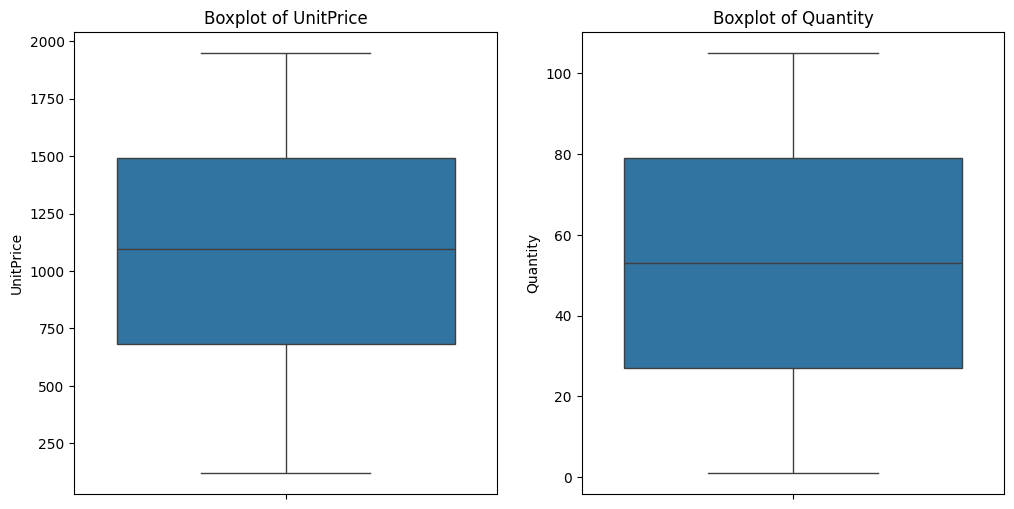

In [64]:
### using boxplot to visualize the outliers in the UnitPrice and Quantity columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data_copy, y='UnitPrice')
plt.title('Boxplot of UnitPrice')
plt.subplot(1, 2, 2)
sns.boxplot(data=data_copy, y='Quantity')
plt.title('Boxplot of Quantity')

#### In conclusion, using the IQR method, there are no outliers in QTY and Unit Price columns

### Dealing with Datatypes

In [54]:
data_copy.dtypes

TransactionDate         object
OrderID                 object
Quantity                 int64
PaymentMethod           object
SalesChannel            object
ProductName             object
Category                object
UnitPrice              float64
CustomerCountry         object
CustomerDateOfBirth     object
CustomerGender          object
CustomerFirstName       object
CustomerLastName        object
CustomerCity            object
CustomerSignupDate      object
IsCurrent                 bool
Currency                object
dtype: object

Convert date columns to datatypes

In [57]:
for col in ['TransactionDate', 'CustomerDateOfBirth', 'CustomerSignupDate']:
    data_copy[col] = data_copy[col].astype('datetime64[ns]')

# check the data types of the columns again
data_copy.dtypes

TransactionDate        datetime64[ns]
OrderID                        object
Quantity                        int64
PaymentMethod                  object
SalesChannel                   object
ProductName                    object
Category                       object
UnitPrice                     float64
CustomerCountry                object
CustomerDateOfBirth    datetime64[ns]
CustomerGender                 object
CustomerFirstName              object
CustomerLastName               object
CustomerCity                   object
CustomerSignupDate     datetime64[ns]
IsCurrent                        bool
Currency                       object
dtype: object

In [66]:
## Delete irrelevant column
data_copy.drop(columns=['Currency'], axis=1, inplace=True)

### Save cleaned data

In [68]:
data_copy.to_csv(r'C:/Users/hp/Downloads/Nonso-ml/ml_data_cleaned.csv', index=False)